# Hãy hoàn thành yêu cầu sau đây

Bài 1: Cho tập ảnh như trong thư mực 'images/*.*'. Ảnh có 2 đồ vật được xếp ở vị trí bât kỳ trên mặt phẳng. Hãy tính góc tạo bởi hai đồ vật này. Code cần được comment đầy đủ, giải thích ý đồ ở từng phần. Học viên nên hiển thị kết quả trung gian để minh họa tính đúng đắn ở mỗi giai đoạn.
- Bước 1: Học viên có thể sử dụng các bộ tham số khác nhau cho từng ảnh.
- Bước 2: Hãy chọn bộ tham số phù hợp cho tất cả các ảnh trên.

Có nhiều cách để giải bài toán này. Một trong những ý tưởng để thực hiện bài toán này là:
- Thực hiện việc phát hiện biên và đường thẳng qua các thuật toán đã học
- Gom nhóm các góc thành 2 nhóm tương ứng với 2 đối tượng trên ảnh
- Tính toán góc giữa 2 vật thể và đưa ra góc cũng như thông báo có song song với nhau hay không.

In [1]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import glob
import os

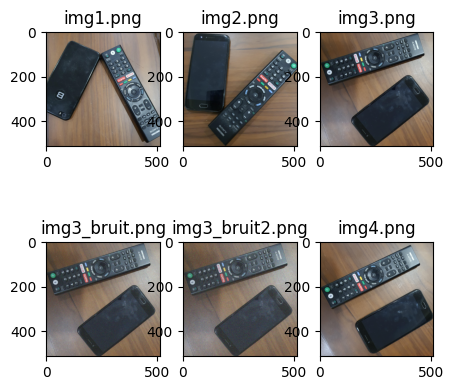

In [3]:
## Đọc ảnh 
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(5,5))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
plt.show() 

In [5]:
def canny_edge_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30):
    ### YOUR CODE HERE ###
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)

    img_canny = cv2.Canny(img_gaussian, threshold1, threshold2) #Lọc Canny theo 2 ngưỡng threshold1 và threshold2
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
            if img_canny[i][j] < skipping_threshold:
                img_canny[i][j] = 0
            else:
                img_canny[i][j] = 1
    return img_canny

def hough_line_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30, rho=1, theta=np.pi/180, threshold=100, min_line_length=100, max_line_gap=50):

    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)
    img_canny = cv2.Canny(img_gaussian, threshold1, threshold2)
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
            if img_canny[i][j] < skipping_threshold:
                img_canny[i][j] = 0
            else:
                img_canny[i][j] = 1
    lines = cv2.HoughLinesP(img_canny, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
    img_line = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img_line, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img_line

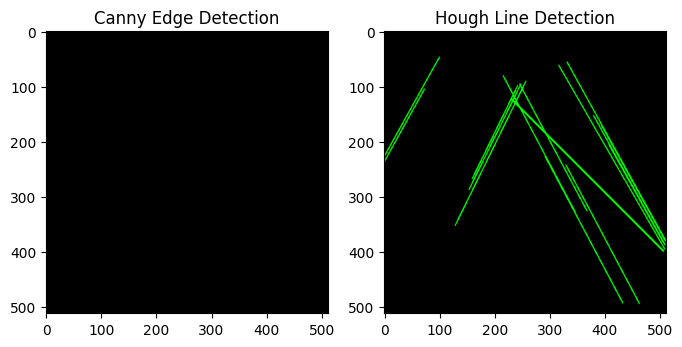

In [6]:
img = cv2.imread('images/img1.png')
img_canny = canny_edge_detection('images/img1.png') 
img_line = hough_line_detection('images/img1.png')
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB))
plt.title('Canny Edge Detection')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')

plt.show()




In [3]:
### Hàm trả ra góc giữa 2 object
### YOUR CODE HERE
def angle_between_objects(img1):
    


### YOUR CODE HERE

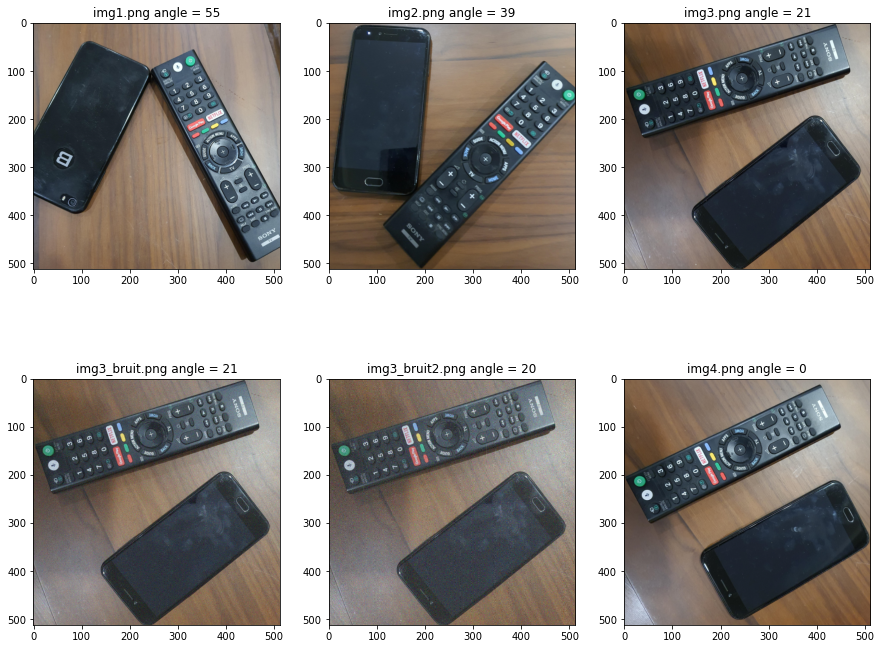

In [6]:
## Hiển thị kết quả 
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,12))
for i,fname in enumerate(images):
    
    angle = angle_between_objects(....) #YOUR CODE HERE
    plt.subplot(row,column,i+1)
    
    img=cv2.imread(fname)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname) + ' angle = ' + str(angle))
plt.show() 